# Binary Search
## Background
- Binary Search operates on a contiguous sequence with a specified left and right index (called the search space)
    - Every turn, the half which the target cant lie is eliminated; thus dividing the search space in 2 after every comparison
        - Maximum number of iterations is log N (base 2)
    - Three parts
        1. Pre-processing: the container needs to be sorted
        2. Binary Search: looping to divide search space in half after each comparison
        3. Post-processing: determine viable candidates in the remaining space
    - Three Templates (99% of problems)
        1. Find the exact value
        2. Find the upper bound
        3. Find the lower bound
    - Use built-in tools
        - Use of bisect in Python
            - bisect.bisect_right looks for the rightmost insertion position and brings the same result as the Upper Bound
            - bisect.bisect_left looks for the leftmost insertion position and ends up with the same result as the Lower Bound

    - 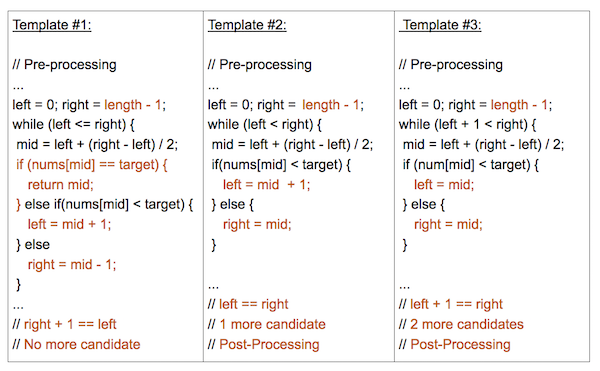
#### Built-in Upper Bound Search

In [3]:
import bisect

from typing import List

def search(nums: List[int], target: int) -> int:
    idx = bisect.bisect_right(nums, target)
    
    if idx > 0 and nums[idx - 1] == target:
        return idx - 1
    return -1

#### Find The Exact Value (left <= right)

In [ ]:
def binarySearch(nums: List[int], target: int) -> int:
    if len(nums) == 0:
        return -1

    left, right = 0, len(nums) - 1
    
    while left <= right: # Termination
        mid = (left + right) // 2
        if nums[mid] == target:
            return mid # Match
        elif nums[mid] < target:
            left = mid + 1 # Searching Right
        else:
            right = mid - 1 # Searching Left

    # End Condition: left > right
    return -1

##### Search In Rotated Sorted Array
- Define the pivot index as representing the smallest element in nums
    - Need to employ a modified binary search algorithm to find the leftmost element that is smaller than or equal to the last elements in nums
- After finding the pivot index, binary search in both partitions for the target
- Algorithm
1. Perform a binary search to locate the pivot element by initializing the boundaries of the searching space as left = 0 and right = n - 1. While left < right:
    - Let mid = left + (right - left) // 2.
    - If nums[mid] > nums[n - 1], this suggests that pivot is located to the right of mid, hence we set left = mid + 1. Otherwise, pivot could be either at mid or to the left of mid, in which case we should set right = mid - 1.
2. Upon completion of the binary search, we have the pivot index denoted as pivot = left.
3. nums consists of two sorted subarrays, nums[0 ~ left - 1] and nums[left ~ n - 1].
4. Perform a binary search over nums[0 ~ left - 1] for target. If target is within this subarray, return its index.
5. Otherwise, perform a binary search over nums[left ~ n - 1] for target. If target is within this subarray, return its index. Otherwise, return -1.

In [ ]:
def search(self, nums: List[int], target: int) -> int:
    n = len(nums)
    left, right = 0, n - 1

    # Find the index of the pivot element (the smallest element)
    while left <= right:
        mid = (left + right) // 2
        if nums[mid] > nums[-1]:
            left = mid + 1
        else:
            right = mid - 1

    # Binary search over an inclusive range [left_boundary ~ right_boundary]
    def binarySearch(left_boundary, right_boundary, target):
        left, right = left_boundary, right_boundary
        while left <= right:
            mid = (left + right) // 2
            if nums[mid] == target:
                return mid
            elif nums[mid] > target:
                right = mid - 1
            else:
                left = mid + 1
        return -1

    # Binary search over elements on the pivot element's left
    if (answer := binarySearch(0, left - 1, target)) != -1:
        return answer 

    # Binary search over elements on the pivot element's right
    return binarySearch(left, n - 1, target)

#### Find The Upper Bound (left < right)
- Guarantees that the search space is at least 2 in size at each step
- Post processing with 1 element left

In [ ]:
def binarySearch(nums: List[int], target: int) -> int:
    if len(nums) == 0:
        return -1

    left, right = 0, len(nums) - 1
    while left < right:
        mid = (left + right) // 2
        if nums[mid] == target:
            return mid
        elif nums[mid] < target:
            left = mid + 1
        else:
            right = mid

    # Post-processing:
    # End Condition: left == right
    if nums[left] == target:
        return left
    return -1

#### Find The Lower Bound (left + 1 < right)
- Use the neighbors to determine if we go left or right
- At least 3 in size at each step
- Post-processing -> ends when you have 2 elements left

In [ ]:
def binarySearch(nums: List[int], target: int) -> int:
    if len(nums) == 0:
        return -1

    left, right = 0, len(nums) - 1
    while left + 1 < right:
        mid = (left + right) // 2
        if nums[mid] == target:
            return mid
        elif nums[mid] < target:
            left = mid
        else:
            right = mid

    # Post-processing:
    # End Condition: left + 1 == right
    if nums[left] == target: return left
    if nums[right] == target: return right
    return -1

##### Search For A Range
- Two binary searches, one for the target and another to see if it's the first or last index of it
    - Special conditions
        1. First position
            - If mid equals begin/left... means mid is the first element
            - If the element left of this index is not equal to the target (ex. nums[mid - 1] != target) we keep searching for the left side of the array
        2. Last position
            - If mid is the same as end/right... means mid is the last element
            - If the element right of mid is not equal to the target we are searching (ex. nums[mid + 1] != target) we keep searching for the right side of the array
- Algo
1. Define a function called findBound which takes three arguments: the array, the target to search for, and a boolean value isFirst which indicates if we are trying to find the first or the last occurrence of target.
2. We use 2 variables to keep track of the subarray that we are scanning. Let's call them begin and end. Initially, begin is set to 0 and end is set to the last index of the array.
3. We iterate until begin is greater than to end.
4. At each step, we calculate the middle element mid = (begin + end) / 2. We use the value of the middle element to decide which half of the array we need to search.
    - nums[mid] == target
        - isFirst is true ~ This implies that we are trying to find the first occurrence of the element. If mid == begin or nums[mid - 1] != target, then we return mid as the first occurrence of the target. Otherwise, we update end = mid - 1
        - isFirst is false ~ This implies we are trying to find the last occurrence of the element. If mid == end or nums[mid + 1] != target, then we return mid as the last occurrence of the target. Otherwise, we update begin = mid + 1
    - nums[mid] > target ~ We update end = mid - 1 since we must discard the right side of the array as the middle element is greater than target.
    - nums[mid] < target ~ We update begin = mid + 1 since we must discard the left side of the array as the middle element is less than target.
5. We return a value of -1 at the end of our function which indicates that target was not found in the array.
6. In the main searchRange function, we first call findBound with isFirst set to true. If this value is -1, we can simply return [-1, -1]. Otherwise, we call findBound with isFirst set to false to get the last occurrence and then return the result.

In [4]:
class Solution:
    def searchRange(self, nums: List[int], target: int) -> List[int]:
        
        lower_bound = self.findBound(nums, target, True)
        if (lower_bound == -1):
            return [-1, -1]
        
        upper_bound = self.findBound(nums, target, False)
        
        return [lower_bound, upper_bound]
        
    def findBound(self, nums: List[int], target: int, isFirst: bool) -> int:
        
        N = len(nums)
        begin, end = 0, N - 1
        while begin <= end:
            mid = int((begin + end) / 2)    
            
            if nums[mid] == target:
                
                if isFirst:
                    # This means we found our lower bound.
                    if mid == begin or nums[mid - 1] < target:
                        return mid

                    # Search on the left side for the bound.
                    end = mid - 1
                else:
                    
                    # This means we found our upper bound.
                    if mid == end or nums[mid + 1] > target:
                        return mid
                    
                    # Search on the right side for the bound.
                    begin = mid + 1
            
            elif nums[mid] > target:
                end = mid - 1
            else:
                begin = mid + 1
        
        return -1

##### Kth Smallest Element in a Sorted Matrix
- Given an n x n matrix where each of the rows and columns is sorted in ascending order, return the kth smallest element in the matrix.
- Note that it is the kth smallest element in the sorted order, not the kth distinct element.

In [1]:
class Solution:
    def countLessEqual(self, matrix, mid, smaller, larger):
        count, n = 0, len(matrix)
        row, col = n - 1, 0
        
        while row >= 0 and col < n:
            if matrix[row][col] > mid:
                # As matrix[row][col] is bigger than the mid, let's keep track of the
                # smallest number greater than the mid
                larger = min(larger, matrix[row][col])
                row -= 1
            else:
                # As matrix[row][col] is less than or equal to the mid, let's keep track of the
                # biggest number less than or equal to the mid
                smaller = max(smaller, matrix[row][col])
                count += row + 1
                col += 1

        return count, smaller, larger
    
    def kthSmallest(self, matrix, k: int) -> int:
        n = len(matrix)
        start, end = matrix[0][0], matrix[n - 1][n - 1]
        
        while start < end:
            mid = start + (end - start) / 2
            smaller, larger = (matrix[0][0], matrix[n - 1][n - 1])

            count, smaller, larger = self.countLessEqual(matrix, mid, smaller, larger)

            if count == k:
                return smaller
            if count < k:
                start = larger  # search higher
            else:
                end = smaller  # search lower

        return start